# AES_Adv_1

In SCA101, we focused only on a single attack location, the SBox, without much explanation or experimentation. In this lab, we'll be trying some other attack locations to better understand why the SBox was used exclusively in SCA101.

## Capture

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET = 'TINYAES128C'

In [2]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../hardware/victims/firmware/simpleserial-aes
make PLATFORM=$1 CRYPTO_TARGET=$2

Building for platform CWLITEARM with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CWLITEARM.hex
rm -f -- simpleserial-aes-CWLITEARM.eep
rm -f -- simpleserial-aes-CWLITEARM.cof
rm -f -- simpleserial-aes-CWLITEARM.elf
rm -f -- simpleserial-aes-CWLITEARM.map
rm -f -- simpleserial-aes-CWLITEARM.sym
rm -f -- simpleserial-aes-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-aes.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s aes.s aes-independant.s
rm -f -- simpleserial-aes.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d aes.d aes-independant.d
rm -f -- simpleserial-aes.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i aes.i aes-independant.i
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc.exe (GNU Tools for ARM Embedded Processors 6-2017-q1-update) 6.3.1 20170215 (release) [ARM/embedded-6-branch

In [3]:
%run "../Helper_Scripts/Setup_Generic.ipynb"

Serial baud rate = 38400
INFO: Found ChipWhisperer😍


In [4]:
fw_path = '../../hardware/victims/firmware/simpleserial-aes/simpleserial-aes-{}.hex'.format(PLATFORM)
cw.program_target(scope, prog, fw_path)

Serial baud rate = 115200
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 5971 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 5971 bytes
Serial baud rate = 38400


In [5]:
#Capture Traces
from tqdm import tnrange, trange
import numpy as np
import time

ktp = cw.ktp.Basic()

traces = []
N = 200  # Number of traces
project = cw.create_project("AES_Adv_1.cwp")

for i in trange(N, desc='Capturing traces'):
    key, text = ktp.next()  # manual creation of a key, text pair can be substituted here

    trace = cw.capture_trace(scope, target, text, key)
    if trace is None:
        continue
    project.traces.append(trace)

#Convert traces to numpy arrays

Capturing traces: 100%|██████████████████████| 200/200 [00:04<00:00, 40.39it/s]


In [6]:
import chipwhisperer.analyzer as cwa
leak_model = cwa.leakage_models.sbox_output
attack = cwa.cpa(project, leak_model)
import chipwhisperer as cw
cb = cwa.get_jupyter_callback(attack)
results = attack.run(cb, 10)

In [7]:
print(results.key_guess())

[43, 126, 21, 22, 40, 174, 210, 166, 171, 247, 21, 136, 9, 207, 79, 60]


In [9]:
leak_model.key_schedule_rounds(results.key_guess(), 0, 10)

[208, 20, 249, 168, 201, 238, 37, 137, 225, 63, 12, 200, 182, 99, 12, 166]

C:\Users\adewar\Downloads\WPy64-3760\python-3.7.6.amd64\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\adewar\Downloads\WPy64-3760\python-3.7.6.amd64\lib\site-packages\fastparquet\dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex
C:\Users\adewar\AppData\Roaming\Python\Python37\site-packages\datashader\transfer_functions.py:21: FutureWarning: xarray subclass Image should explicitly define __slots__
  class Image(xr.DataArray):


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
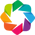

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [7]:
plot_data = cwa.analyzer_plots(results)
def byte_to_color(idx):
    return hv.Palette.colormaps['Category20'](idx/16.0)

import holoviews as hv
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.operation import decimate
import pandas as pd, numpy as np

a = []
b = []
hv.extension('bokeh')
for i in range(0, 16):
    data = plot_data.output_vs_time(i)
    a.append(np.array(data[1]))
    b.append(np.array(data[2]))
    b.append(np.array(data[3]))
    
pda = pd.DataFrame(a).transpose().rename(str, axis='columns')
pdb = pd.DataFrame(b).transpose().rename(str, axis='columns')
curve = hv.Curve(pdb['0'], "Sample").options(color='black')
for i in range(1, 16):
    curve *= hv.Curve(pdb[str(i)]).options(color='black')
    
for i in range(0, 16):
    curve *= hv.Curve(pda[str(i)]).options(color=byte_to_color(i))
decimate(curve.opts(width=900, height=600))

In [ ]:
import chipwhisperer.analyzer as cwa
leak_model = cwa.leakage_models.sbox_output
attack = cwa.cpa(project, leak_model)
import chipwhisperer as cw
cb = cwa.get_jupyter_callback(attack)
results = attack.run(cb, 10)

In [24]:
leak_model = cwa.leakage_models.plaintext_key_xor

In [26]:
print(cwa.leakage_models)

after_key_mix:
  After key mix operation.

inverse_sbox_output:
  Inverse Sbox output.

last_round_state:
  Last round state.

last_round_state_diff:
  Last round state using hamming distance.

last_round_state_diff_alternate:
  Last round state using hamming distance, alternate.

mix_columns_output:
  Output of the mix columns operation.

plaintext_key_xor:
  Plain text key XOR.

round_1_2_state_diff_key_mix:
  Hamming distance between round 1 and 2 state during key mix
  operation.

round_1_2_state_diff_sbox:
  Hamming distance between round 1 and 2 state during sbox lookup
  operation.

round_1_2_state_diff_text:
  Hamming distance between round 1 and 2 state using plain text.

sbox_in_out_diff:
  Hamming distance between SBox input and output.

sbox_input_successive:
  Successive Sbox input.

sbox_output:
  SBox Output.

sbox_output_successive:
  Successive SBox output.

shift_columns_output:
  Output of the shift columns operation.


In [25]:
attack = cwa.cpa(project, leak_model)
import chipwhisperer as cw
cb = cwa.get_jupyter_callback(attack)
results = attack.run(cb, 10)

At first glance, our attack appears to have partially failed, recovering roughly half the key bytes. This isn't quite true: we've got two equal key guesses for each byte. Remember back to the "recovering data from a single bit" slides: the correct key and its inverse will produce inverted results. This means that they're both have the same correlation with the power trace, just that one is negative and one is positive.

So we have two possible guesses for each key. Is this enough to stop us from recovering the key? In this case, it's pretty easy to brute force the correct key. In an actual attack, we might not know the ciphertext, making it much harder to bruteforce the key.

The XOR operation is also linear, meaning incorrect key guesses have higher correlations than they would with a non-linear operation like the SBox. If we didn't have as nice of a measurement environment, this might make the difference between being able to tell we've got the key and not.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
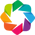

:DynamicMap   []
   :Overlay
      .Curve.I      :Curve   [Sample]   (0)
      .Curve.II     :Curve   [index]   (1)
      .Curve.III    :Curve   [index]   (2)
      .Curve.IV     :Curve   [index]   (3)
      .Curve.V      :Curve   [index]   (4)
      .Curve.VI     :Curve   [index]   (5)
      .Curve.VII    :Curve   [index]   (6)
      .Curve.VIII   :Curve   [index]   (7)
      .Curve.IX     :Curve   [index]   (8)
      .Curve.X      :Curve   [index]   (9)
      .Curve.XI     :Curve   [index]   (10)
      .Curve.XII    :Curve   [index]   (11)
      .Curve.XIII   :Curve   [index]   (12)
      .Curve.XIV    :Curve   [index]   (13)
      .Curve.XV     :Curve   [index]   (14)
      .Curve.XVI    :Curve   [index]   (15)
      .Curve.XVII   :Curve   [index]   (0)
      .Curve.XVIII  :Curve   [index]   (1)
      .Curve.XIX    :Curve   [index]   (2)
      .Curve.XX     :Curve   [index]   (3)
      .Curve.XXI    :Curve   [index]   (4)
      .Curve.XXII   :Curve   [index]   (5)
      .Curve.XXIII  :Curve   [index]   (6)
      .Curve.XXIV   :Curve   [index]   (7)
      .Curve.XXV    :Curve   [index]   (8)
      .Curve.XXVI   :Curve   [index]   (9)
      .Curve.XXVII  :Curve   [index]   (10)
      .Curve.XXVIII :Curve   [index]   (11)
      .Curve.XXIX   :Curve   [index]   (12)
      .Curve.XXX    :Curve   [index]   (13)
      .Curve.XXXI   :Curve   [index]   (14)
      .Curve.XXXII  :Curve   [index]   (15)

In [17]:
plot_data = cwa.analyzer_plots(results)
def byte_to_color(idx):
    return hv.Palette.colormaps['Category20'](idx/16.0)

import holoviews as hv
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.operation import decimate
import pandas as pd, numpy as np

a = []
b = []
hv.extension('bokeh')
for i in range(0, 16):
    data = plot_data.output_vs_time(i)
    a.append(np.array(data[1]))
    b.append(np.array(data[2]))
    b.append(np.array(data[3]))
    
pda = pd.DataFrame(a).transpose().rename(str, axis='columns')
pdb = pd.DataFrame(b).transpose().rename(str, axis='columns')
curve = hv.Curve(pdb['0'], "Sample").options(color='black')
for i in range(1, 16):
    curve *= hv.Curve(pdb[str(i)]).options(color='black')
    
for i in range(0, 16):
    curve *= hv.Curve(pda[str(i)]).options(color=byte_to_color(i))
decimate(curve.opts(width=900, height=600))

In [23]:
import chipwhisperer.analyzer as cwa
leak_model = cwa.leakage_models.new_model(ShiftRowsOutput)
attack = cwa.cpa(project, leak_model)
import chipwhisperer as cw
cb = cwa.get_jupyter_callback(attack)
results = attack.run(cb, 10)

For the shift rows output, we can see that the attack has again failed. This time, it's much worse: we've recovered only 4 bytes. All the rest have completely failed! You might've noticed something odd about the bytes that failed: every key guess has exactly the same correlation! To understand this, we'll need to look at what the shift rows instruction actuall does. As the name suggests, it shifts the rows of the AES state around, more specifically, it turns the following matrix:

$$
state = \left( \begin{array}
& S0 & S4 & S8 & S12 \\
S1 & S5 & S9 & S13 \\
S2 & S6 & S10 & S14 \\
S3 & S7 & S11 & S15
\end{array} \right)
$$

into this one:

$$
state = \left( \begin{array}
& S0 & S4 & S8 & S12 \\
S5 & S9 & S13 & S1 \\
S10 & S14 & S2 & S6 \\
S15 & S3 & S7 & S11
\end{array} \right)
$$

Except for the top row, for which our guess succeeded, the bytes don't align anymore. This isn't technically a difference that should affect anything in our attack. Analyzer, however, only considers one byte key guess at a time and assumes that all the others are zero. This means the leakage was always calculated for a key byte of 0. We could fix this in the leakage model, but really there's no reason to: shift rows is just moving values around, it's not changing anything. This means we don't really learn anything new as compared to the SBox output, at least for a software AES attack.

A similar problem affects the next operation in AES, mix columns. It however, can't be fixed with a simple leakage model change. The mix columns operation provides **diffusion**, which means that multiple bytes are combined together (4 per column). Suddenly, we can't guess each key byte individually, we need to guess them as groups of 4. Suddenly, our attack has went from a search space of $16*2^8=4096$ to $4*2^{32}=17179869184$, which would take more time to break than you're probably willing to put into a lab.

In [30]:
import chipwhisperer.analyzer as cwa
leak_model = cwa.leakage_models.mix_columns_output
attack = cwa.cpa(project, leak_model)
import chipwhisperer as cw
cb = cwa.get_jupyter_callback(attack)
results = attack.run(cb, 10)

## Attacking from the other end

As we've seen, there's not much point to advancing past the SBox for our software AES attack. What about attacking from the other end? While the other leakage models didn't really any advantages over the SBox output for a software AES attack, there's actually a big reason why we'd like to try an attack from the other end of AES - we'd be able to use the ciphertext instead of the plaintext. While we know both the plaintext and ciphertext for our lab examples, this might not always be the case. For example, what if the target was encrypting messages and sending them to another device? We could monitor the communication lines to learn the ciphertext, but learning the plaintext isn't quite as simple.

Looking at a block diagram of AES, we can see that the last block is actually different from the rest of the blocks:

![](images/AES_Encryption.png)

The first thing to notice is that there's no MixColumns operation for the last round. Considering how much that operation increases our search space, that's a welcome thing to see! In fact, we can basically repeat our attack from the other plaintext side here, we just need to account for ShiftRows. ChipWhisperer again has a leakage model for this built in. How does it account for ShiftRows? If we take a look at the source for the model:

```python
class LastroundHW(AESLeakageHelper):
    name = 'HW: AES Last-Round State'
    def leakage(self, pt, ct, key, bnum):
        # HD Leakage of AES State between 9th and 10th Round
        # Used to break SASEBO-GII / SAKURA-G
        st10 = ct[self.INVSHIFT_undo[bnum]]
        st9 = inv_sbox(ct[bnum] ^ key[bnum])
        return st9

    def process_known_key(self, inpkey):
        return key_schedule_rounds(inpkey, 0, 10)
```

we can see it just shifts the ciphertext to line up with the correct key. Let's see if we can get this model to work. Capture some traces near the end of the AES operation (remember we're attacking at the last round),

and we can repeat the attack with the new leakage model:

In [ ]:
import chipwhisperer.analyzer as cwa
leak_model = cwa.leakage_models.last_round_state
attack = cwa.cpa(project, leak_model)
import chipwhisperer as cw
cb = cwa.get_jupyter_callback(attack)
results = attack.run(cb, 10)

You should see that the attack is really confident about a key, but it doesn't seem to be the right one. The block diagram shown above doesn't tell the whole story. The AddRoundKey operation doesn't keep adding the same key. Instead, a transformation is applied to the key for each round and that is added to the state instead. The leakage model includes a method called `key_schedule_rounds()` that we can use to transform our last round key into the first round key that we would recover normally:

In [ ]:
input_key = leak_model.key_schedule_rounds(results.key_guess(), 10, 0)